DIA2
ZHAOJUN GUO&
MUCHAN DENG

## Open the data from Google drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/My Drive/TP_nlp/NLP_final"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['avisassurance_train.csv',
 'avisassurance_test.csv',
 'treetagger_v6',
 'model_lstm.png',
 'data',
 'word_dict.pickle']

In [ ]:
import pandas as pd
train=pd.read_csv("avisassurance_train.csv",sep=';')
test=pd.read_csv("avisassurance_test.csv",sep=';')

In [ ]:
train.head(10)

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto
5,06 mars 2...,1,spam-62064,"Vente forcée par téléphone, prétextant des évè...",Néoliane Santé,sante
6,05 octobr...,3,ludovic-b-135966,Nouveau client satisfait du prix et des servic...,APRIL,sante
7,17 septem...,1,laetitia741-97523,Un assureur m'a contacté par telephone pour me...,SantéVet,animaux
8,12 janvie...,1,gbernard10-102485,Je ne peux que rejoindre les nombreux avis nég...,Mercer,sante
9,21 mars 2...,1,rezo31-62544,GENERALI ASSURANCES VIE PATRIMOINE Très mauvai...,Generali,vie


In [ ]:
test.head(10)

,date,auteur,avis,assureur,produit
0,16 novemb...,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto
1,16 novemb...,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto
2,16 novemb...,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto
3,16 novemb...,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto
4,15 novemb...,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto
5,15 novemb...,beaudoux-t-139689,"Satisfait, de très bon conseils de la part du ...",L'olivier Assurance,auto
6,15 novemb...,cotin-j-139683,"Pour l'instant, pas eu de problème mon contrat...",L'olivier Assurance,auto
7,15 novemb...,thiery-l-139681,"Je suis satisfaite de vos services, facile d'u...",L'olivier Assurance,auto
8,15 novemb...,royet-j-139672,Je suis satisfait du service et de la proposit...,L'olivier Assurance,auto
9,15 novemb...,defez-a-139646,Prix correct et rapide rien à dire nous verron...,L'olivier Assurance,auto


## Data exploration

Deal with the null data.

In [ ]:
train.isnull().sum().sort_values()

date        0
note        0
assureur    0
produit     0
auteur      1
avis        1
dtype: int64

In [ ]:
test.isnull().sum().sort_values()

date        0
auteur      0
assureur    0
produit     0
avis        1
dtype: int64

So we decided to remove all the null data.

In [ ]:
train=train.dropna()

In [ ]:
test=test.dropna()

Check if there is the duplicated data

In [ ]:
train.duplicated().sum()

5

In [ ]:
test.duplicated().sum()

1

In [ ]:
# We drop all duplicates from our data
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Deal with the Date

In [ ]:
train.date[0]

'                                     06 septembre 2021 suite à une expérience en septembre 2021                                '

In [ ]:
import datetime

In [ ]:
def return_date(a):
  dicts={'janvier':1,'février':2,'mars':3,'avril':4,'mai':5,'juin':6,
'juillet':7,'août':8,'septembre':9,
'octobre':10,'novembre':11,'décembre':12}
  d_dropna = list(filter(None,a.split(" "))) 
  return datetime.date(int(d_dropna[2]), int(dicts[d_dropna[1]]), int(d_dropna[0]))

train['Date']=train.apply(lambda x: return_date(x['date']), axis=1)

In [ ]:
test['Date']=test.apply(lambda x: return_date(x['date']), axis=1)

In [ ]:
def return_experiencedate(a):
  dicts={'janvier':1,'février':2,'mars':3,'avril':4,'mai':5,'juin':6,
'juillet':7,'août':8,'septembre':9,
'octobre':10,'novembre':11,'décembre':12}
  d_dropna = list(filter(None,a.split(" "))) 
  return datetime.date(int(d_dropna[-1]), int(dicts[d_dropna[-2]]),1)

train['experienceDate']=train.apply(lambda x: return_experiencedate(x['date']), axis=1)

In [ ]:
test['experienceDate']=test.apply(lambda x: return_experiencedate(x['date']), axis=1)

In [ ]:
train=train.drop(['date'],axis=1)
test=test.drop(['date'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


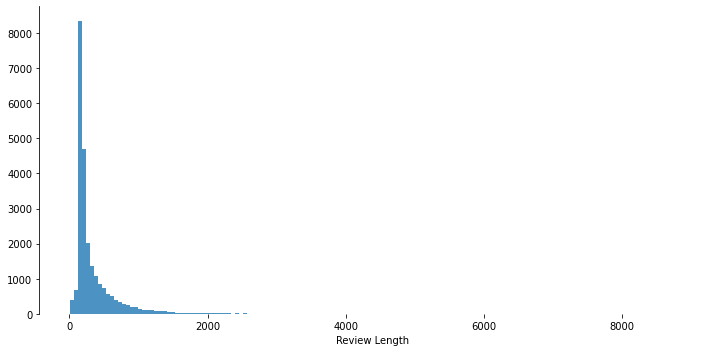

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reviews_length = train['avis'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

In [ ]:
THRESHOLD = 2000
short_reviews = train[train['avis'].str.len() <= THRESHOLD]
long_reviews =  train[train['avis'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(train)
))

230 reviews with LEN > 2000 (0.95 % of total data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


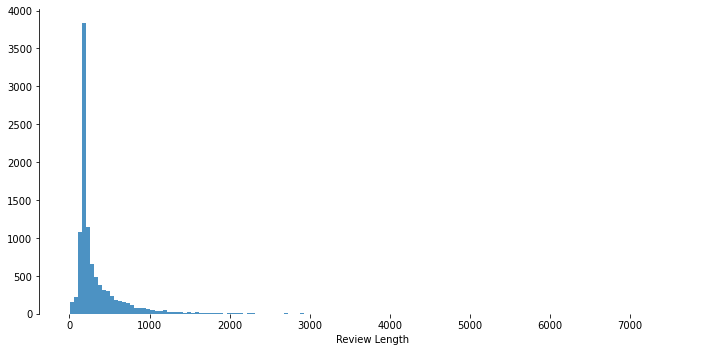

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reviews_length = test['avis'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

In [ ]:
THRESHOLD = 2000
short_reviews = test[test['avis'].str.len() <= THRESHOLD]
long_reviews =  test[test['avis'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(test)
))

80 reviews with LEN > 2000 (0.77 % of total data)


In [ ]:
LENGTH_THRESH = 2000
train = train[train['avis'].str.len() <= LENGTH_THRESH]

In [ ]:
LENGTH_THRESH = 2000
test = test[test['avis'].str.len() <= LENGTH_THRESH]

In [ ]:
train=train.reset_index()
test=test.reset_index()

In [ ]:
len(train)

23868

In [ ]:
len(test)

10250

In [ ]:
trainbert=train.copy()

In [ ]:
testbert=test.copy()

In [ ]:
train_hub=train.copy()



## Data visualisation

Percentual of assureur: 
MAAF                    2.538964
AXA                     2.551533
Santiane                2.744260
AMV                     2.853193
MACIF                   3.410424
Néoliane Santé          3.586392
GMF                     4.147813
APRIL Moto              4.281884
L'olivier Assurance    17.881683
Direct Assurance       24.610357
Name: assureur, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


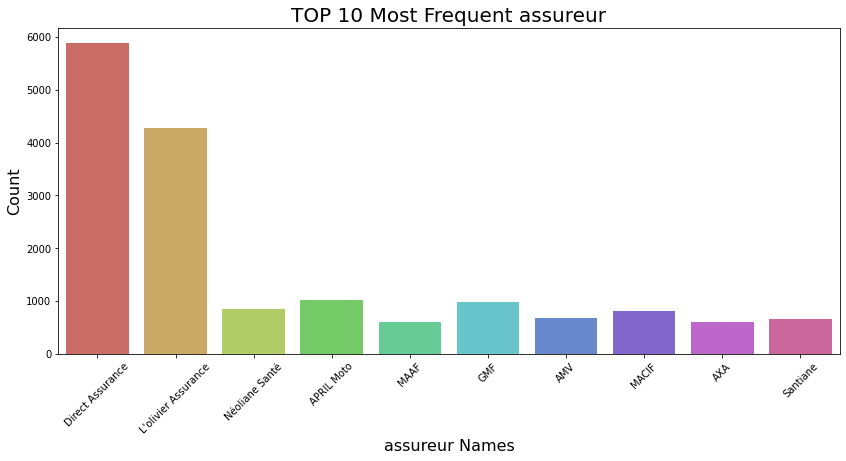

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# the top 10 of assureur represent % of total
print("Percentual of assureur: ")
print(train['assureur'].value_counts().sort_values()[-10:]/len(train)*100 ) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(train[train['assureur'].isin(train['assureur'].value_counts().sort_values()[-10:].index.values)]['assureur']
, palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent assureur", fontsize=20) # Adding Title and seting the size
plt.xlabel("assureur Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [ ]:
list(train['produit'].value_counts().index)

['auto',
 'sante',
 'moto',
 'habitation',
 'prevoyance',
 'credit',
 'vie',
 'animaux',
 'multirisque-professionnelle',
 'garantie-decennale',
 'assurances-professionnelles',
 'responsabilite-civile-professionnelle',
 'flotte-automobile']

([<matplotlib.patches.Wedge at 0x7fe11fbef110>,
 [Text(-0.05335869723905348, 1.0987050784577956, 'animaux'),
  Text(-0.18750424417265876, 1.0839013600956684, 'vie'),
  Text(-0.35719830037313605, 1.04038904944763, 'credit'),
  Text(-0.5442534326416298, 0.955922696172553, 'prevoyance'),
  Text(-0.842203266940879, 0.7075971008661008, 'habitation'),
  Text(-1.0841722057039593, 0.1859317842086498, 'moto'),
  Text(-0.9273840223386209, -0.5915732204140417, 'sante'),
  Text(1.0599357659595412, -0.29417031128202054, 'auto')],
 [Text(-0.029104743948574624, 0.5992936791587976, '1.5%'),
  Text(-0.10227504227599568, 0.5912189236885463, '2.4%'),
  Text(-0.1948354365671651, 0.5674849360623435, '2.7%'),
  Text(-0.2968655087136163, 0.5214123797304834, '3.2%'),
  Text(-0.45938360014957025, 0.3859620550178731, '8.0%'),
  Text(-0.591366657656705, 0.10141733684108171, '8.8%'),
  Text(-0.5058458303665204, -0.3226763020440227, '14.7%'),
  Text(0.578146781432477, -0.16045653342655664, '58.6%')])

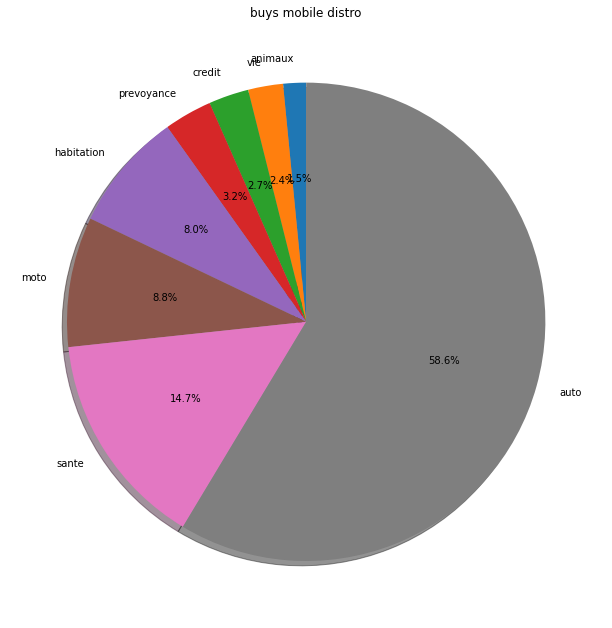

In [ ]:
p=train['produit'].value_counts().sort_values()[-8:]/len(train)*100 
labels = list(train['produit'].value_counts().sort_values()[-8:].index)
fig, ax = plt.subplots(1,1, figsize=(11,11))
ax.set_title("buys mobile distro")
ax.pie(p, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

So,58.5% is produit of auto

In [ ]:
pd_average=pd.DataFrame([[0,0]],columns=['assureur','note'])
dict_average={}
assureur=list(train['assureur'].value_counts().index)
for i in range(len(assureur)):
  note=train[train['assureur']==assureur[i]]['note'].mean()
  dict_average[assureur[i]]=note

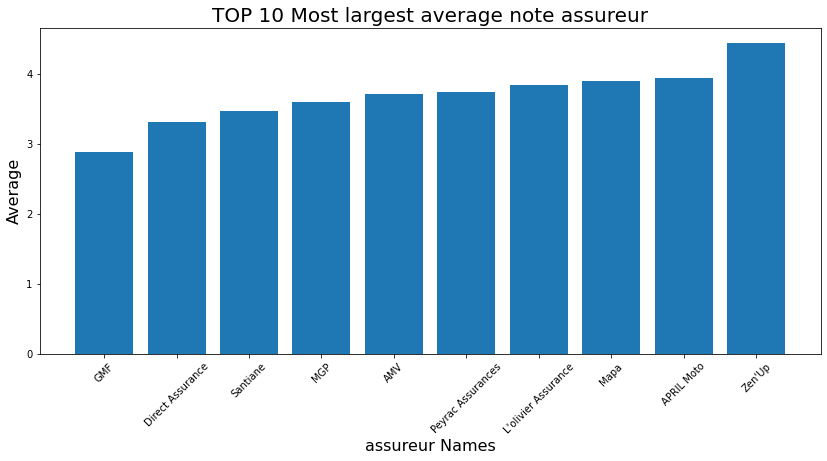

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
plt.bar(pd.DataFrame(pd.Series(dict_average),columns=['note']).sort_values(by='note')[-10:].index,pd.DataFrame(pd.Series(dict_average),columns=['note']).sort_values(by='note')[-10:]['note']) # It's a module to count the category's
plt.title("TOP 10 Most largest average note assureur", fontsize=20) # Adding Title and seting the size
plt.xlabel("assureur Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Average", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

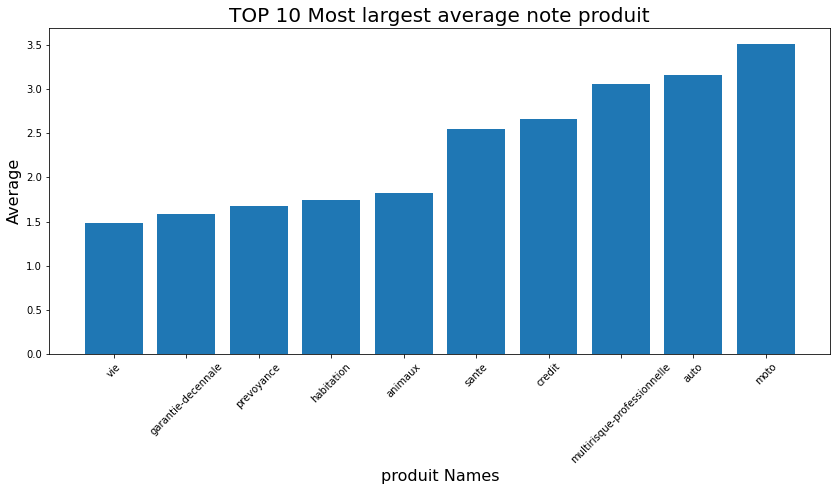

In [ ]:
pd_average=pd.DataFrame([[0,0]],columns=['produit','note'])
dict_average={}
produit=list(train['produit'].value_counts().index)
for i in range(len(produit)):
  note=train[train['produit']==produit[i]]['note'].mean()
  dict_average[produit[i]]=note

import matplotlib.pyplot as plt
import seaborn as sns
# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
plt.bar(pd.DataFrame(pd.Series(dict_average),columns=['note']).sort_values(by='note')[-10:].index,pd.DataFrame(pd.Series(dict_average),columns=['note']).sort_values(by='note')[-10:]['note']) # It's a module to count the category's
plt.title("TOP 10 Most largest average note produit", fontsize=20) # Adding Title and seting the size
plt.xlabel("produit Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Average", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

## Do some cleaning

### Install treetagger

In [ ]:
!pip install treetaggerwrapper

In [ ]:
mkdir treetagger_v6

mkdir: cannot create directory ‘treetagger_v6’: File exists


In [ ]:
cd treetagger_v6

/content/drive/My Drive/TP_nlp/NLP_final/treetagger_v6


In [ ]:
!wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
!tar -xzvf tree-tagger-linux-3.2.4.tar.gz

--2022-01-11 21:45:00--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz.11’

tree-tagger-linux-3 100%[===================>]   1.80M  1000KB/s    in 1.8s    

2022-01-11 21:45:02 (1000 KB/s) - ‘tree-tagger-linux-3.2.4.tar.gz.11’ saved [1889240/1889240]

bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes


In [ ]:
!wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz

--2022-01-11 21:45:03--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210377 (205K) [application/x-gzip]
Saving to: ‘tagger-scripts.tar.gz’

tagger-scripts.tar. 100%[===================>] 205.45K   259KB/s    in 0.8s    

2022-01-11 21:45:05 (259 KB/s) - ‘tagger-scripts.tar.gz’ saved [210377/210377]



In [ ]:
!gunzip tagger-scripts.tar.gz

gzip: tagger-scripts.tar already exists; do you wish to overwrite (y or n)? y


In [ ]:
!wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh

--2022-01-11 21:45:10--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14575 (14K) [application/x-shellscript]
Saving to: ‘install-tagger.sh.10’

install-tagger.sh.1 100%[===================>]  14.23K  54.3KB/s    in 0.3s    

2022-01-11 21:45:12 (54.3 KB/s) - ‘install-tagger.sh.10’ saved [14575/14575]



In [ ]:
!sh install-tagger.sh

In [ ]:
ls

bin/                  README.script
cmd/                  Release-Notes
COPYRIGHT             tagger-scripts.tar
doc/                  tagger-scripts.tar.gz.1
FILES                 tagger-scripts.tar.gz.2
install-tagger.sh     tree-tagger-linux-3.2.4.tar.gz
install-tagger.sh.1   tree-tagger-linux-3.2.4.tar.gz.1
install-tagger.sh.10  tree-tagger-linux-3.2.4.tar.gz.10
install-tagger.sh.2   tree-tagger-linux-3.2.4.tar.gz.11
install-tagger.sh.3   tree-tagger-linux-3.2.4.tar.gz.2
install-tagger.sh.4   tree-tagger-linux-3.2.4.tar.gz.3
install-tagger.sh.5   tree-tagger-linux-3.2.4.tar.gz.4
install-tagger.sh.6   tree-tagger-linux-3.2.4.tar.gz.5
install-tagger.sh.7   tree-tagger-linux-3.2.4.tar.gz.6
install-tagger.sh.8   tree-tagger-linux-3.2.4.tar.gz.7
install-tagger.sh.9   tree-tagger-linux-3.2.4.tar.gz.8
lib/                  tree-tagger-linux-3.2.4.tar.gz.9
README


In [ ]:
cd lib

/content/drive/My Drive/TP_nlp/NLP_final/treetagger_v6/lib


In [ ]:
!wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/french.par.gz

--2022-01-11 21:45:14--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/french.par.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2437873 (2.3M) [application/x-gzip]
Saving to: ‘french.par.gz’

french.par.gz       100%[===================>]   2.32M  1.26MB/s    in 1.9s    

2022-01-11 21:45:17 (1.26 MB/s) - ‘french.par.gz’ saved [2437873/2437873]



In [ ]:
!gunzip french.par.gz

gzip: french.par already exists; do you wish to overwrite (y or n)? y


In [ ]:
cd ..

/content/drive/My Drive/TP_nlp/NLP_final/treetagger_v6


In [ ]:
cd ..

/content/drive/My Drive/TP_nlp/NLP_final


### Clean the data

In [ ]:
import treetaggerwrapper
import re
taggerssss = treetaggerwrapper.TreeTagger(TAGLANG='fr', TAGDIR='treetagger_v6/')

/usr/local/lib/python3.7/dist-packages/treetaggerwrapper.py:740: FutureWarning: Possible nested set at position 8
  re.IGNORECASE | re.VERBOSE)
/usr/local/lib/python3.7/dist-packages/treetaggerwrapper.py:2044: FutureWarning: Possible nested set at position 152
  re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.7/dist-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.7/dist-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


In [ ]:
def French_Preprocess_listofSentence(data):
  all_lis=[]
  for i in range(len(data)):
    lis=[]
    data.avis[i]=data.avis[i].lower()
    data.avis[i]=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '',data.avis[i], flags=re.MULTILINE)
    data.avis[i]=re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil)[\S]*\s?','',data.avis[i])
    data.avis[i]=data.avis[i].replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
    data.avis[i]=data.avis[i].replace('.', '. ')
    data.avis[i] = re.sub(r'[0-9]+', '', data.avis[i])
    tags = taggerssss.tag_text(data.avis[i])
    for k in tags:
      lists=[]
      result = eval(repr(k).replace('\\', '@'))
      lists.append(result.split('@')[0])
      lists.append(result.split('@')[1])
      lis.append(lists)
    all_lis.append(lis)
    data['avis'][i]=all_lis[i]
  return data

French_Preprocess_listofSentence(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

,index,note,auteur,avis,assureur,produit,Date,experienceDate
0,0,5,brahim--k-131532,"[[meilleurs, tADJ], [assurances, tNOM], [,, tP...",Direct Assurance,auto,2021-09-06,2021-09-01
1,1,4,bernard-g-112497,"[[je, tPRO:PER], [suis, tVER:pres], [globaleme...",Direct Assurance,auto,2021-05-03,2021-05-01
2,2,5,virginie-t-107352,"[[prix, tNOM], [tres, tVER:futu], [abordable, ...",Direct Assurance,auto,2021-03-21,2021-03-01
3,3,4,boulain-f-116580,"[[je, tPRO:PER], [satisfait, tVER:pres], [du, ...",L'olivier Assurance,auto,2021-06-10,2021-06-01
4,4,1,ouaille31-51798,"[[client, tNOM], [depuis, tPRP], [plus, tADV],...",Matmut,auto,2017-01-29,2017-01-01
...,...,...,...,...,...,...,...,...
23863,24100,1,hophop-107522,"[[assurance, tNOM], [moto, tNOM], [chez, tPRP]...",Mutuelle des Motards,moto,2021-03-22,2021-03-01
23864,24101,1,tzl-81680,"[[même, tADV], [les, tDET:ART], [demandes, tNO...",Allianz,habitation,2019-12-06,2019-12-01
23865,24102,1,jmr-72500-110395,"[[en, tPRP], [décembre, tNOM], [,, tPUN], [j',...",Cegema Assurances,sante,2021-04-14,2021-04-01
23866,24103,3,cris-77532,"[[je, tPRO:PER], [suis, tVER:pres], [assurer, ...",GMF,auto,2019-07-11,2019-07-01


In [ ]:
train.avis

0        [[meilleurs, tADJ], [assurances, tNOM], [,, tP...
1        [[je, tPRO:PER], [suis, tVER:pres], [globaleme...
2        [[prix, tNOM], [tres, tVER:futu], [abordable, ...
3        [[je, tPRO:PER], [satisfait, tVER:pres], [du, ...
4        [[client, tNOM], [depuis, tPRP], [plus, tADV],...
                               ...                        
23863    [[assurance, tNOM], [moto, tNOM], [chez, tPRP]...
23864    [[même, tADV], [les, tDET:ART], [demandes, tNO...
23865    [[en, tPRP], [décembre, tNOM], [,, tPUN], [j',...
23866    [[je, tPRO:PER], [suis, tVER:pres], [assurer, ...
23867    [[bonjour, tNOM], [mon, tDET:POS], [ami, tNOM]...
Name: avis, Length: 23868, dtype: object

In [ ]:

seg_word=train.avis
n_word = seg_word.apply(lambda x: len(x)) 

In [ ]:
n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]
index_content = sum(n_content, [])  

In [ ]:
seg_word = sum(seg_word,[])
# mot
word = [x[0] for x in seg_word]
# sens du mot
nature = [x[1] for x in seg_word]

In [ ]:
# content_type
content_type = [[x]*y for x,y in zip(list(train['note']),list(n_word))]
content_type = sum(content_type,[])

In [ ]:

result = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature,
                      'note' : content_type})

In [ ]:
result

,index_content,word,nature,note
0,1,meilleurs,tADJ,5
1,1,assurances,tNOM,5
2,1,",",tPUN,5
3,1,prix,tNOM,5
4,1,",",tPUN,5
...,...,...,...,...
1498032,23868,faire,tVER:infi,1
1498033,23868,le,tDET:ART,1
1498034,23868,plus,tADV,1
1498035,23868,grand,tADJ,1


In [ ]:
result=result[result['nature'] != 'tPRO:PER']
result = result[result['nature'] != 'tPUN']
result = result[result['nature'] != 'tSENT']
result = result[result['nature'] != 'tPRP:det']
result = result[result['nature'] != 'tPRP']
result = result[result['nature'] != 'tKON']
result = result[result['nature'] != 'tVER:pres']

In [ ]:
result

,index_content,word,nature,note
0,1,meilleurs,tADJ,5
1,1,assurances,tNOM,5
3,1,prix,tNOM,5
5,1,solutions,tNOM,5
7,1,écoute,tNOM,5
...,...,...,...,...
1498032,23868,faire,tVER:infi,1
1498033,23868,le,tDET:ART,1
1498034,23868,plus,tADV,1
1498035,23868,grand,tADJ,1


In [ ]:
import nltk
nltk.download('stopwords')
french_stopwords = nltk.corpus.stopwords.words('french')
word=list(result.word.values)
words = list(set(word) - set(french_stopwords))
result = result[result['word'].isin(words)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
word=list(result.word.values)

In [ ]:
import nltk
vocabulary = nltk.FreqDist(word)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

l';11678
assurance;11467
très;9271
plus;7813
n';7450
service;6418
prix;6336
bien;4903
contrat;4769
tout;4519
c';4454
mois;4338
cette;4291
satisfait;4089
faire;3502
sinistre;3368
ans;3332
client;3263
avoir;3248
toujours;3192
";3166
rien;2980
donc;2559
rapide;2453
téléphone;2426
merci;2401
fait;2389
véhicule;2375
dossier;2275
mutuelle;2252
suite;2184
aucun;2155
non;2134
jamais;2109
alors;2091
être;2090
tous;2040
cela;2029
bon;1915
fois;1909
simple;1862
devis;1822
aucune;1809
assureur;1806
réponse;1794
charge;1784
voiture;1737
euros;1718
personne;1714
satisfaite;1706
cas;1651
site;1617
assuré;1553
temps;1544
moins;1535
direct;1517
bonne;1512
ça;1508
remboursement;1499
accident;1482
€;1482
voir;1453
%;1452
tarif;1430
autre;1414
problème;1395
qu';1389
plusieurs;1388
tarifs;1378
année;1345
payer;1344
mail;1339
jours;1312
cher;1293
jour;1284
services;1277
prise;1272
fuir;1271
demande;1271
encore;1260
conseiller;1249
rapport;1246
peu;1242
expert;1238
assurances;1232
deux;1232
compte;1229
respo

In [ ]:
reject_word=["l'","n'","c'","d'",'"',"€","qu'","ça","où",'%']
word=list(result.word.values)
words = list(set(word) - set(reject_word))
result = result[result['word'].isin(words)]

In [ ]:
result

,index_content,word,nature,note
0,1,meilleurs,tADJ,5
1,1,assurances,tNOM,5
3,1,prix,tNOM,5
5,1,solutions,tNOM,5
7,1,écoute,tNOM,5
...,...,...,...,...
1498029,23868,procédure,tNOM,1
1498032,23868,faire,tVER:infi,1
1498034,23868,plus,tADV,1
1498035,23868,grand,tADJ,1


In [ ]:
import nltk
word=list(result.word.values)
vocabulary = nltk.FreqDist(word)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

assurance;11467
très;9271
plus;7813
service;6418
prix;6336
bien;4903
contrat;4769
tout;4519
mois;4338
cette;4291
satisfait;4089
faire;3502
sinistre;3368
ans;3332
client;3263
avoir;3248
toujours;3192
rien;2980
donc;2559
rapide;2453
téléphone;2426
merci;2401
fait;2389
véhicule;2375
dossier;2275
mutuelle;2252
suite;2184
aucun;2155
non;2134
jamais;2109
alors;2091
être;2090
tous;2040
cela;2029
bon;1915
fois;1909
simple;1862
devis;1822
aucune;1809
assureur;1806
réponse;1794
charge;1784
voiture;1737
euros;1718
personne;1714
satisfaite;1706
cas;1651
site;1617
assuré;1553
temps;1544
moins;1535
direct;1517
bonne;1512
remboursement;1499
accident;1482
voir;1453
tarif;1430
autre;1414
problème;1395
plusieurs;1388
tarifs;1378
année;1345
payer;1344
mail;1339
jours;1312
cher;1293
jour;1284
services;1277
prise;1272
fuir;1271
demande;1271
encore;1260
conseiller;1249
rapport;1246
peu;1242
expert;1238
assurances;1232
deux;1232
compte;1229
responsable;1185
part;1179
bonjour;1176
contrats;1166
vraiment;1139


In [ ]:
# construire la colonne de la position du mot dans la phrase
import numpy as np
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = sum(index_word,[])
result['index_word'] = index_word
result.reset_index(drop=True,inplace=True)

In [ ]:
# extraire les id des phrases possedant des nom (et pas des verbes)
ind = result[[x == 'tNOM' for x in result['nature']]]['index_content'].unique()
# extraire commentaire results
results = result[result['index_content'].isin(ind)]
# reset lindex
results.reset_index(drop=True,inplace=True)

In [ ]:
import nltk
word=list(results.word.values)
final_vocabulary = nltk.FreqDist(word)

In [ ]:
len(final_vocabulary)

27209

In [ ]:
MAX_FEATURES = 12000 # freq de mot max
vocab_size = min(MAX_FEATURES, len(final_vocabulary)) + 2
# construire le dict de la freq des mots
word2index = {x[0]: i+2 for i, x in enumerate(final_vocabulary.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
# enregistrer le dict de la freq des mots

In [ ]:
import pickle
with open('word_dict.pickle', 'wb') as handle:
    pickle.dump(word2index, handle, protocol=pickle.HIGHEST_PROTOCOL)

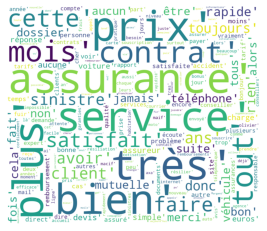

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# groupby word.count
frequencies = results.groupby(by = ['word'])['word'].count()
# ordre descendant
frequencies = frequencies.sort_values(ascending = False)[:200]
wordlist=list(frequencies.index)
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(str(wordlist))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
all_data=pd.concat([trainbert,testbert],axis=0)

In [ ]:

!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git &> /dev/null
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
french_stopwords = nltk.corpus.stopwords.words('french')
lemmatizer = FrenchLefffLemmatizer()
def French_Preprocess_listofSentence(sentence):
    preprocess_list = []
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

    return tokenize_sentence

new_avis=[]
l=len(train['avis'])
for i in range(l):
  new_avis.append(French_Preprocess_listofSentence(all_data['avis'][i]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim 
# train word2vec on the two sentences
num_features = 300    # Word vector dimensionality
min_word_count = 10   # Minimum word count
num_workers = 16       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words
model = gensim.models.Word2Vec(new_avis, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sg = 1, sample = downsampling)

In [ ]:
w = 'meilleur'
r = model.similar_by_word(w)

print("Le plus proche word avec "+w+" est：")
for i in r:
    print(i)

Le plus proche word avec meilleur est：
('imbattable', 0.656801700592041)
('interessant', 0.6258652210235596)
('qualité-prix', 0.6219062805175781)
('marché', 0.6216448545455933)
('concurence', 0.618495523929596)
('meilleures', 0.6162171363830566)
('parmis', 0.6151142716407776)
('meilleurs', 0.611415445804596)
('attiré', 0.6098800897598267)
('recherchais', 0.6095585823059082)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0, flags=flags)


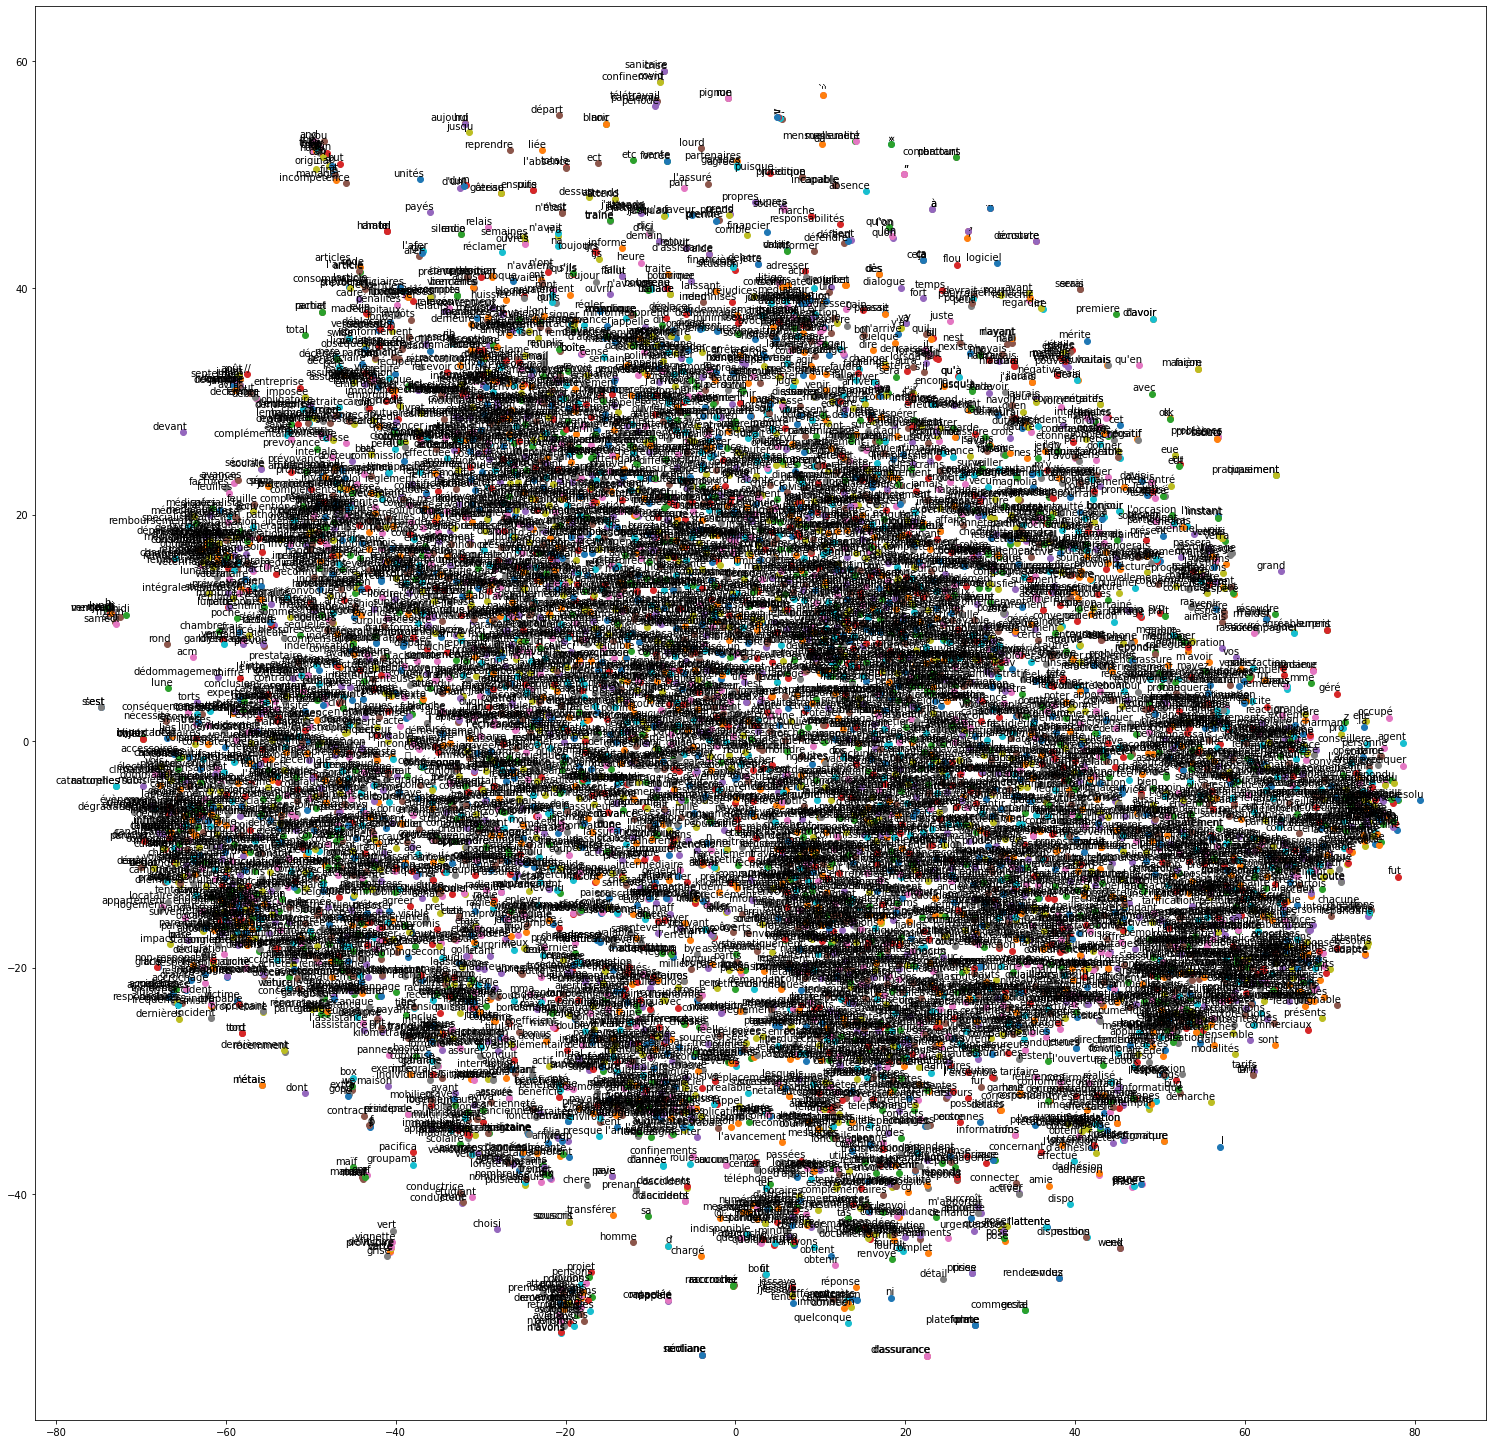

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index2word):
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(26, 26)) 
    for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(4, 1),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)


# Unsupervised learning

In [ ]:
results.note.value_counts()

1    254719
2    126219
4     79628
5     78239
3     75660
Name: note, dtype: int64

In [ ]:
datanote1=results[results.note==1]
datanote2=results[results.note==2]
datanote3=results[results.note==3]
datanote4=results[results.note==4]
datanote5=results[results.note==5]

In [ ]:
datanote2

,index_content,word,nature,note,index_word
326,13,interface,tNOM,2,0
327,13,téléphonique,tADJ,2,1
328,13,service,tNOM,2,2
329,13,client,tNOM,2,3
330,13,assez,tADV,2,4
...,...,...,...,...,...
613511,23835,-même,tADJ,2,30
613512,23835,némame,tNOM,2,31
613513,23835,envoyer,tVER:infi,2,32
613514,23835,garage,tNOM,2,33


In [ ]:
ind=list(datanote1.index_content.value_counts().index)

In [ ]:
list_word1=[]
for i in ind:
  list_word1.append(list(datanote1[datanote1.index_content==i].word.values))

In [ ]:
dict1 = corpora.Dictionary(list_word1)  
corpus1 = [dict1.doc2bow(j) for j in list_word1]  

In [ ]:
list_word2=[]
ind=list(datanote2.index_content.value_counts().index)
for i in ind:
  list_word2.append(list(datanote2[datanote2.index_content==i].word.values))
dict2 = corpora.Dictionary(list_word2)  
corpus2 = [dict2.doc2bow(j) for j in list_word2]  


In [ ]:
list_word3=[]
ind=list(datanote3.index_content.value_counts().index)
for i in ind:
  list_word3.append(list(datanote3[datanote3.index_content==i].word.values))
dict3 = corpora.Dictionary(list_word3)  
corpus3 = [dict3.doc2bow(j) for j in list_word3]  

list_word4=[]
ind=list(datanote4.index_content.value_counts().index)
for i in ind:
  list_word4.append(list(datanote4[datanote4.index_content==i].word.values))
dict4 = corpora.Dictionary(list_word4)  
corpus4 = [dict4.doc2bow(j) for j in list_word4]  

list_word5=[]
ind=list(datanote5.index_content.value_counts().index)
for i in ind:
  list_word5.append(list(datanote5[datanote5.index_content==i].word.values))
dict5 = corpora.Dictionary(list_word5)  
corpus5 = [dict5.doc2bow(j) for j in list_word5]  

In [ ]:
!pip install gensim==3.6.0

In [ ]:
!pip install  pyLDAvis

In [ ]:
!pip install pandas --upgrade

In [ ]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
# Build LDA model
lda_model =  models.ldamodel.LdaModel(corpus=corpus1,
                                           id2word=dict1,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print("The note 1")
lda_model.print_topics(num_words=5)

The note 1


[(0,
  '0.013*"vie" + 0.010*"dossiers" + 0.008*"respect" + 0.007*"traitement" + 0.006*"pacifica"'),
 (1,
  '0.058*"assurance" + 0.022*"sinistre" + 0.022*"prix" + 0.021*"ans" + 0.018*"plus"'),
 (2,
  '0.018*"service" + 0.017*"très" + 0.017*"mois" + 0.015*"client" + 0.014*"contrat"'),
 (3,
  '0.013*"macif" + 0.012*"expert" + 0.011*"matmut" + 0.010*"maif" + 0.009*"indemnisation"')]

In [ ]:
lda_model2 =  models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=dict2,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


lda_model3 =  models.ldamodel.LdaModel(corpus=corpus3,
                                           id2word=dict3,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [ ]:

lda_model4 =  models.ldamodel.LdaModel(corpus=corpus4,
                                           id2word=dict4,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


lda_model5 =  models.ldamodel.LdaModel(corpus=corpus5,
                                           id2word=dict5,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print("The note 2")
lda_model2.print_topics(num_words=5)

The note 2


[(0,
  '0.015*"charge" + 0.011*"macif" + 0.010*"prise" + 0.009*"franchise" + 0.008*"expert"'),
 (1,
  '0.022*"mois" + 0.018*"toujours" + 0.012*"téléphone" + 0.011*"dossier" + 0.010*"remboursement"'),
 (2,
  '0.011*"tres" + 0.006*"meme" + 0.006*"apres" + 0.006*"choix" + 0.005*"choses"'),
 (3,
  '0.033*"assurance" + 0.019*"prix" + 0.017*"plus" + 0.017*"service" + 0.016*"sinistre"')]

In [ ]:
print("The note 3")
lda_model3.print_topics(num_words=5)

The note 3


[(0,
  '0.013*"sinistre" + 0.012*"ans" + 0.010*"rapidité" + 0.009*"accueil" + 0.008*"tres"'),
 (1,
  '0.032*"prix" + 0.032*"assurance" + 0.029*"satisfait" + 0.026*"service" + 0.021*"très"'),
 (2,
  '0.008*"telephone" + 0.005*"telephonique" + 0.005*"ca" + 0.004*"ecoute" + 0.004*"espere"'),
 (3,
  '0.029*"mutuelle" + 0.015*"augmentation" + 0.011*"concurrence" + 0.010*"espérant" + 0.005*"proposition"')]

In [ ]:
print("The note 4")
lda_model4.print_topics(num_words=5)

The note 4


[(0,
  '0.062*"assurance" + 0.061*"service" + 0.054*"satisfait" + 0.053*"prix" + 0.029*"satisfaite"'),
 (1,
  '0.027*"plus" + 0.016*"ans" + 0.015*"véhicule" + 0.015*"sinistre" + 0.013*"facilité"'),
 (2,
  '0.018*"attentes" + 0.017*"espérant" + 0.016*"conditions" + 0.013*"l’écoute" + 0.012*"automobile"'),
 (3,
  '0.063*"très" + 0.022*"bien" + 0.019*"satisfait" + 0.017*"bonne" + 0.016*"prix"')]

In [ ]:
print("The note 5")
lda_model5.print_topics(num_words=5)

The note 5


[(0,
  '0.028*"mutuelle" + 0.024*"amis" + 0.022*"entourage" + 0.021*"besoins" + 0.021*"recommander"'),
 (1,
  '0.046*"cordialement" + 0.011*"raisonnables" + 0.009*"zéro" + 0.009*"utiliser" + 0.007*"monsieur"'),
 (2,
  '0.061*"prix" + 0.057*"satisfait" + 0.056*"assurance" + 0.046*"service" + 0.021*"rapide"'),
 (3,
  '0.104*"très" + 0.043*"satisfaite" + 0.034*"merci" + 0.021*"écoute" + 0.018*"bonne"')]

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
from pyLDAvis import gensim_models

In [ ]:
!pip install --upgrade pandas==1.2

In [ ]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(lda_model, corpus1, dict1)
vis

In [ ]:
pyLDAvis.enable_notebook()
vis2 = gensim_models.prepare(lda_model2, corpus2, dict2)
vis2

In [ ]:
pyLDAvis.enable_notebook()
vis3 = gensim_models.prepare(lda_model3, corpus3, dict3)
vis3

In [ ]:
pyLDAvis.enable_notebook()
vis4 = gensim_models.prepare(lda_model4, corpus4, dict4)
vis4

In [ ]:
pyLDAvis.enable_notebook()
vis5 = gensim_models.prepare(lda_model5, corpus5, dict5)
vis5

# Supervised learning

## Tensorflow hub

In [ ]:
train_data=train_hub.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from itertools import accumulate

print(train_data.groupby('note')['note'].count())

train_data['length'] = train_data['avis'].apply(lambda x: len(x))
len_df = train_data.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['avis'].tolist()

plt.bar(sent_length, sent_freq)
plt.title("Sentence length and frequency statistics graph")
plt.xlabel("Sentence length")
plt.ylabel("The frequency of sentence length")
plt.show()

sent_pentage_list = [(count/sum(sent_freq)) for count in accumulate(sent_freq)]
plt.plot(sent_length, sent_pentage_list)
quantile = 0.91
#print(list(sent_pentage_list))
for length, per in zip(sent_length, sent_pentage_list):
    if round(per, 2) == quantile:
        index = length
        break
print("\nSentence length with quantile %s:%d." % (quantile, index))
plt.plot(sent_length, sent_pentage_list)
plt.hlines(quantile, 0, index, colors="c", linestyles="dashed")
plt.vlines(index, 0, quantile, colors="c", linestyles="dashed")
plt.text(0, quantile, str(quantile))
plt.text(index, 0, str(index))
plt.title("Sentence length cumulative distribution function graph")
plt.xlabel("Sentence length")
plt.ylabel("Sentence length cumulative frequency")
plt.show()

In [ ]:
!pip install tensorflow_text

In [ ]:
# -*- coding: utf-8 -*-

import pickle
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text
embedding=hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual/3')
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

In [ ]:
train_data.avis

In [ ]:
target=train_data.pop('note')

In [ ]:
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

In [ ]:
from keras.layers.core import Activation, Dense, SpatialDropout1D
def rmse(predictions, targets):
    return tf.sqrt(tf.reduce_mean((targets-predictions)**2))
def create_model(embedding):
  model = tf.keras.Sequential()
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(16,activation='relu'))
  model.add(tf.keras.layers.Dense(1))

  model.summary()
  model.compile(loss=rmse, optimizer='Adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
x=list(train_data.avis.values)
y=list(target.values)
for i in range(len(y)):
  y[i]=float(y[i])

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)
train_y=np.asarray(y)
test_y=np.asarray(test_y)
train_x=np.asarray(x)
test_x=np.asarray(test_x)

In [ ]:
model_pretrain_embedding_hub.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               68927232  
                                                                 
 dense (Dense)               (None, 16)                8208      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 68,935,457
Trainable params: 8,225
Non-trainable params: 68,927,232
_________________________________________________________________


In [ ]:
model_pretrain_embedding_hub=create_model(embedding)

In [ ]:
model_pretrain_embedding_hub.layers[0].trainable=False

In [ ]:
history = model_pretrain_embedding_hub.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=10, batch_size=512, verbose=1)

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
y_predict=model_pretrain_embedding_hub.predict(test_x)
rmse(y_predict, test_y)

In [ ]:
!ls

avisassurance_test.csv	 data		 treetagger_v6
avisassurance_train.csv  model_lstm.png  word_dict.pickle


In [ ]:
Test_final_x=list(test.avis.values)
Test_final_x=np.asarray(Test_final_x)
Final_predict=model_pretrain_embedding_hub.predict(Test_final_x)
Final_result=test.copy()
Final_result['avis']=Final_predict

In [ ]:
Final_result_model_pretrain_embedding_hub=Final_result

In [ ]:
Final_result_model_pretrain_embedding_hub.to_pickle("Final_result_model_pretrain_embedding_hub.pkl")

In [ ]:
!ls

a_file.pkl		 data		 word_dict.pickle
avisassurance_test.csv	 model_lstm.png
avisassurance_train.csv  treetagger_v6


## LSTM

In [ ]:
# load le dictionnarie de split word
with open('word_dict.pickle', 'rb') as handle:
    word2index = pickle.load(handle)

### preparer les data
MAX_FEATURES = 120002 # freq max des mots 
MAX_SENTENCE_LENGTH = 300 # longueur max de la phrase
num_recs = 0  # nombre de sample

# initialiser la list des phrases et de label
X = np.empty(num_recs,dtype=list)
i=0

In [ ]:
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git &> /dev/null
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
french_stopwords = nltk.corpus.stopwords.words('french')
lemmatizer = FrenchLefffLemmatizer()
def French_Preprocess_listofSentence(sentence):
    preprocess_list = []
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
    return tokenize_sentence
X=[]
for i in range(len(train_data)):
  X.append(French_Preprocess_listofSentence(train_data.avis[i]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i in range(len(X)):  
  seqs=[]
  for word in X[i]:
    if word in word2index:
      seqs.append(word2index[word])
    else:
      seqs.append(word2index["UNK"]) #The word in vocab ->UNK
  X[i] = seqs

In [ ]:
import pickle
from keras.layers.core import Activation, Dense, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)

In [ ]:
y=list(target.values)
for i in range(len(y)):
  y[i]=float(y[i])

y=np.asarray(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain.shape

(19094, 300)

In [ ]:
def rmse(predictions, targets):
    return tf.sqrt(tf.reduce_mean((targets-predictions)**2))
## construie le reseau
EMBEDDING_SIZE = 50 
HIDDEN_LAYER_SIZE = 128 
BATCH_SIZE = 512 
NUM_EPOCHS = 10 
# creer une instance
model_lstm = Sequential()

model_lstm.add(Embedding(MAX_FEATURES, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
model_lstm.add(SpatialDropout1D(0.2))

model_lstm.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(tf.keras.layers.Dense(1, activation=None))
model_lstm.summary()
model_lstm.compile(loss=rmse, optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError()])

## train le modele
model_lstm.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           6000100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,091,877
Trainable params: 6,091,877
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
38/38 [==============================] - 48s 1s/step - loss: 1.9542 - root_mean_squared_error: 2.05

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
y_predict=model_lstm.predict(Xtest)

In [ ]:
y_predict

array([[1.2317333],
       [4.2951837],
       [2.0604637],
       ...,
       [1.3395258],
       [1.5771525],
       [4.3731356]], dtype=float32)

In [ ]:
ytest

array([1., 5., 2., ..., 1., 3., 5.])

In [ ]:
rmse(y_predict, ytest)

2.051472097017478

In [ ]:
Test_final_x=list(test.avis.values)
Final_X=[]
for i in range(len(Test_final_x)):
  Final_X.append(French_Preprocess_listofSentence(Test_final_x[i]))

for i in range(len(Final_X)):  
  seqs=[]
  for word in Final_X[i]:
    if word in word2index:
      seqs.append(word2index[word])
    else:
      seqs.append(word2index["UNK"]) 
  Final_X[i] = seqs

Final_X = sequence.pad_sequences(Final_X, maxlen=MAX_SENTENCE_LENGTH)

In [ ]:
Final_result=model_lstm.predict(Final_X)
Final_result_LSTM=test.copy()
Final_result_LSTM['avis']=Final_result
Final_result_LSTM.to_pickle("Final_result_LSTM.pkl")

## Bert

In [ ]:
!pip install Sentencepiece
!pip install transformers
from transformers import CamembertTokenizer


In [ ]:
from transformers import CamembertModel, CamembertTokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

In [ ]:
type(tokenizer)

transformers.models.camembert.tokenization_camembert.CamembertTokenizer

In [ ]:
valdata=trainbert.sample(10000,random_state=42)
testdata=trainbert.sample(4000,random_state=42)

In [ ]:
val_reviews=list(valdata.avis.values)
test_reviews=list(testdata.avis.values)

In [ ]:
train_reviews=list(trainbert.avis.values)

In [ ]:
some_review = train_reviews[0]
some_review

'Meilleurs assurances, prix, solutions, écoute, rapidité, et je recommande cette compagnie pour vous \r\nDes prix attractif et services de qualité et rapidité '

In [ ]:
tokenizer.tokenize(some_review)[:15]

['▁Meilleurs',
 '▁assurances',
 ',',
 '▁prix',
 ',',
 '▁solutions',
 ',',
 '▁écoute',
 ',',
 '▁rapidité',
 ',',
 '▁et',
 '▁je',
 '▁recommande',
 '▁cette']

In [ ]:
tokenizer.encode(some_review)[:15]

[5, 19595, 11492, 7, 258, 7, 1392, 7, 4661, 7, 9679, 7, 14, 50, 3953]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Average length: 73.2
Max length: 512


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


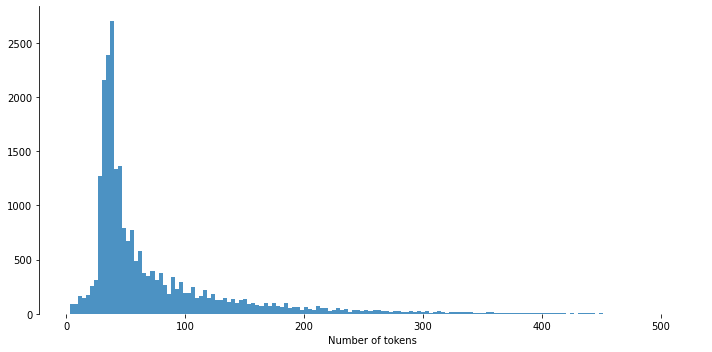

In [ ]:
import numpy as np
reviews_len = [len(tokenizer.encode(review, max_length=512))
                          for review in train_reviews]
print("Average length: {:.1f}".format(np.mean(reviews_len)))
print("Max length: {}".format(max(reviews_len)))

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Number of tokens')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

In [ ]:
tokenizer.vocab_size

32005

In [ ]:
MAX_SEQ_LEN = 300 # in terms of generated tokens (not words)

short_reviews = sum(np.array(reviews_len) <= MAX_SEQ_LEN)
long_reviews = sum(np.array(reviews_len) > MAX_SEQ_LEN)

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    long_reviews,
    MAX_SEQ_LEN,
    100 * long_reviews / len(reviews_len)
))

429 reviews with LEN > 300 (1.80 % of total data)


In [ ]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}

In [ ]:
encoded_train = encode_reviews(tokenizer, train_reviews, MAX_SEQ_LEN)
encoded_valid = encode_reviews(tokenizer, val_reviews, MAX_SEQ_LEN)
encoded_test = encode_reviews(tokenizer, test_reviews, MAX_SEQ_LEN)

Multi class classification

In [ ]:
def to_cat(y):
  for i in range(len(y)):
    y[i]=int(y[i]-1)
  from keras.utils.np_utils import to_categorical
  y = to_categorical(y, num_classes=5)
  return y

In [ ]:
y_train = to_cat(np.array(trainbert.note.values))
y_val = to_cat(np.array(valdata.note.values))
y_test = to_cat(np.array(testdata.note.values))

In [ ]:
import tensorflow as tf
from transformers import TFCamembertForSequenceClassification, CamembertTokenizer

model = TFCamembertForSequenceClassification.from_pretrained("jplu/tf-camembert-base", num_labels=5)
tokenizer = CamembertTokenizer.from_pretrained("jplu/tf-camembert-base")

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

Some layers of TFCamembertForSequenceClassification were not initialized from the model checkpoint at jplu/tf-camembert-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

In [ ]:
model.layers

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-07)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)    
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "tf_camembert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 110031360 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 594437    
 ficationHead)                                                   
                                                                 
Total params: 110,625,797
Trainable params: 110,625,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    encoded_train, y_train, epochs=3, batch_size=16, 
    validation_data=(encoded_valid, y_val), verbose=1
)

Epoch 1/3
  31/1492 [..............................] - ETA: 14:56 - loss: 1.6066 - accuracy: 0.2762 - root_mean_squared_error: 0.5630

KeyboardInterrupt: ignored

In [ ]:
test_result=list(testbert.avis.values)
encoded_test_result=encode_reviews(tokenizer, test_result, MAX_SEQ_LEN)

In [ ]:
result_predict=model.predict(encoded_test_result)

In [ ]:
for i in range(len(result_predict)):
  result_predict[i]=result_predict[i].index(max(result_predict[i]))+1

Final_result_bert=test.copy()
Final_result_bert['avis']=result_predict
Final_result_bert.to_pickle("Final_result_bert.pkl")

